In [460]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Let us load The dataset

Basic Understandings:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [302]:
df=pd.read_csv('database_IND.csv')

In [303]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


From the above dataset we could see that most of the columns are Nan a ,let us find the no of Nan Values

In [304]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


# EDA

In [305]:
df.shape

(907, 27)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [307]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We could see that 'other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','estimated_generation_gwh',estimated_generation_gwh has no values init ,
Let us remove from our dataset

In [308]:
df=df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','estimated_generation_gwh','country_long','year_of_capacity_data'],axis=1)

In [309]:
df=df.drop(['generation_gwh_2019'],axis=1)

In [310]:
df.isnull().sum()

country                     0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

# Imputation Technique

we could see that there is no of Null values .Let us Treat it using Imputation technique

In [311]:
df['latitude'].mean()

21.19791811846691

In [312]:
df['longitude'].mean()

77.46490720092922

In [313]:
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [314]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [315]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [316]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [317]:
df['commissioning_year'].mean()

1997.0910815939278

In [318]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mean())

In [319]:
df.isnull().sum()

country                     0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [320]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.979200,1997.091082,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2003.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [321]:
df['owner'].mode()

0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
dtype: object

In [322]:
df['owner']=df['owner'].fillna(df['owner'].mode()[0])

In [326]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [327]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())

In [328]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [329]:
df.isnull().sum()

country                   0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

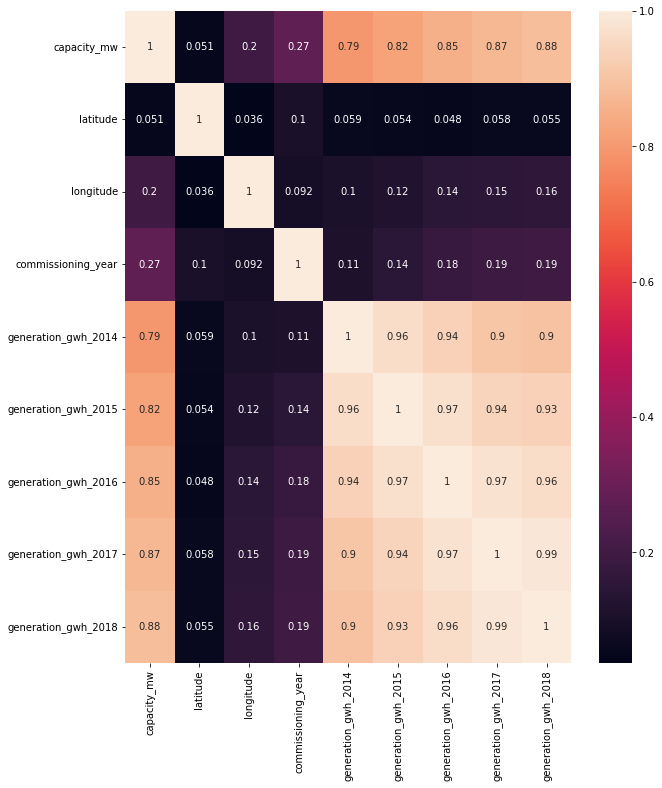

In [330]:
plt.subplots(figsize=(10,12))
sns.heatmap(df.corr(),annot=True)

In [331]:
df.shape

(907, 19)

In [332]:
df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority


# We Could see that Most of the Features have Positive Corr with the target 

Now Our data is without null values ,let us Find the Skewness 

# Let Us Find The Skewness

In [333]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
commissioning_year    -1.399359
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [334]:
cat_data=df.select_dtypes(include=[np.object]).columns

In [249]:
cat_data

Index(['country', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner',
       'source', 'url', 'geolocation_source', 'generation_data_source'],
      dtype='object')

In [335]:
Num_data=df.select_dtypes(include=[np.float64]).columns

In [336]:
Num_data

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

# Data Visualization

UNIVARIENT ANALYSIS

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

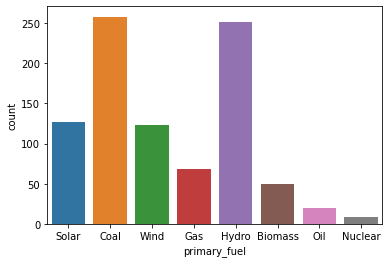

In [337]:
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

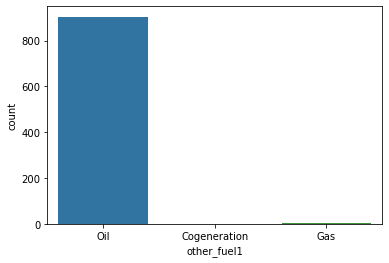

In [338]:
sns.countplot(df['other_fuel1'])

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

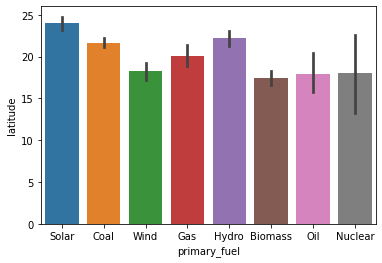

In [339]:
sns.barplot(x=df['primary_fuel'],y=df['latitude'])

We could understand that the solar has high a;titude followed by coal and hydro fuel.

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

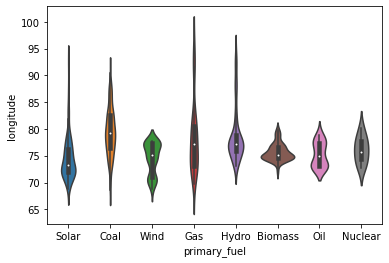

In [340]:
sns.violinplot(x=df['primary_fuel'],y=df['longitude'])

We could see that the Gas has high Longitude followed by hydroFuel and Solar

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

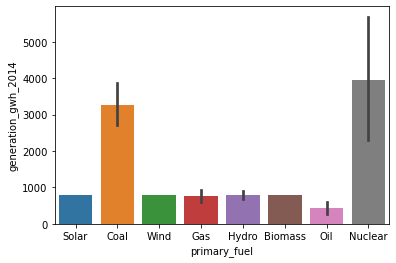

In [256]:
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

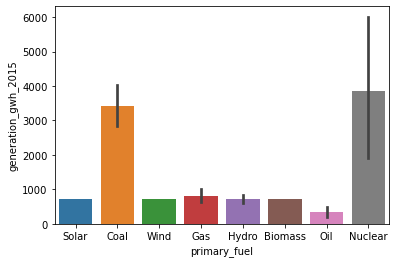

In [342]:
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)

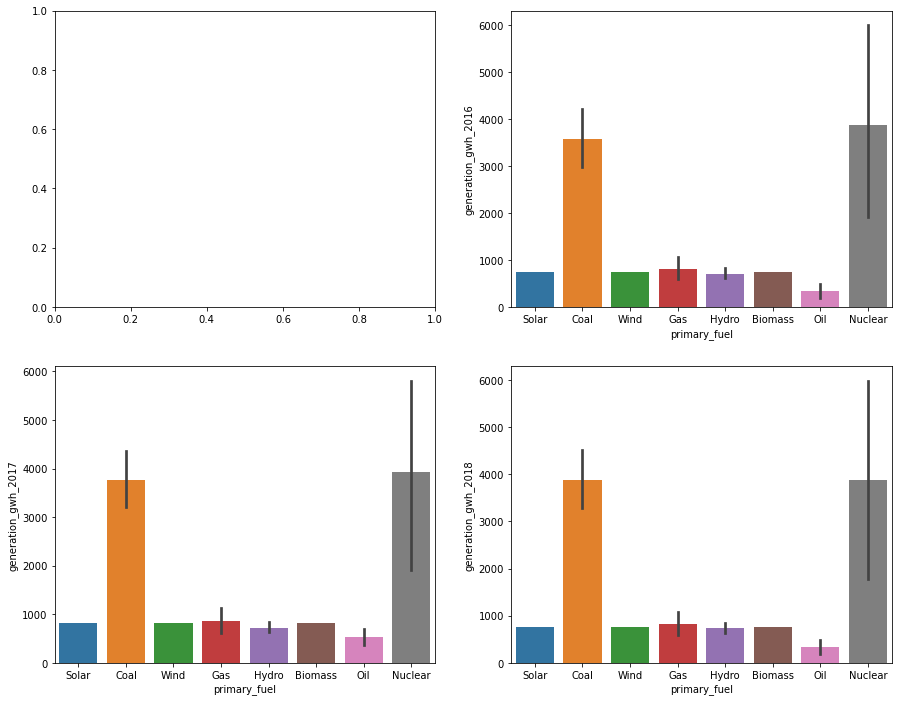

In [343]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[0,1],data=df)

sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,0],data=df)

sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[1,1],data=df)
plt.show()

From above GWH we could understand that the geneartion of Coal and Nuclear power is higher for all the years 
*the solar and Gas GWH has inscreased for the year 2017 and 2018

Now Let us analyse the targets to get a view on how much power is generated and the energy source used for it

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

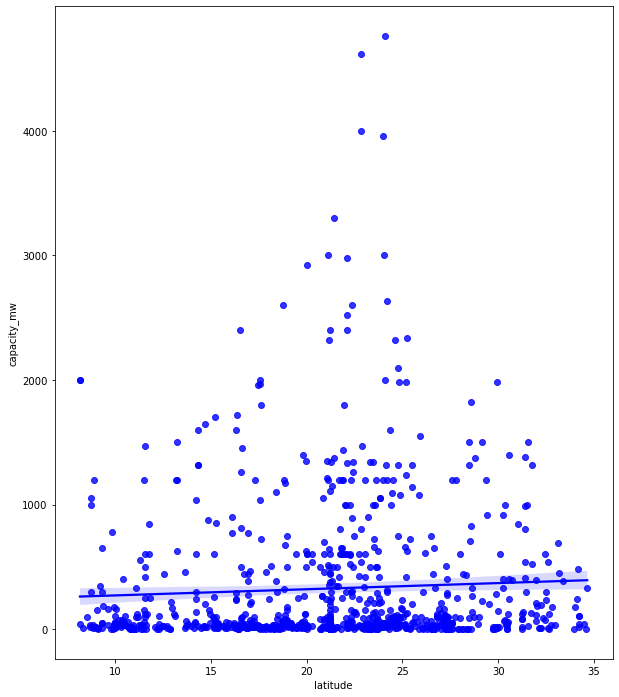

In [344]:
plt.subplots(figsize=(10,12))
sns.regplot(df['latitude'],df['capacity_mw'],color='b')

We could observe that the 1000 to 1500 mw of enery is average generated one ,and at a latitude of 20 to 25

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

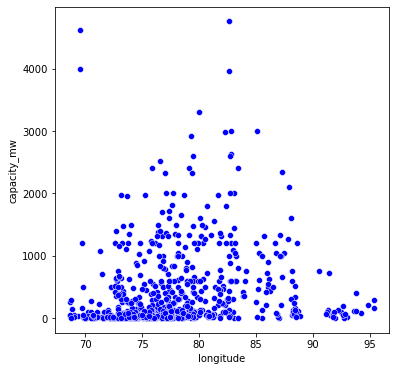

In [260]:
plt.subplots(figsize=(6,6))
sns.scatterplot(df['longitude'],df['capacity_mw'],color='b')

#At 70 to 84 almost 1500 to 2000 Mw power has been Generated

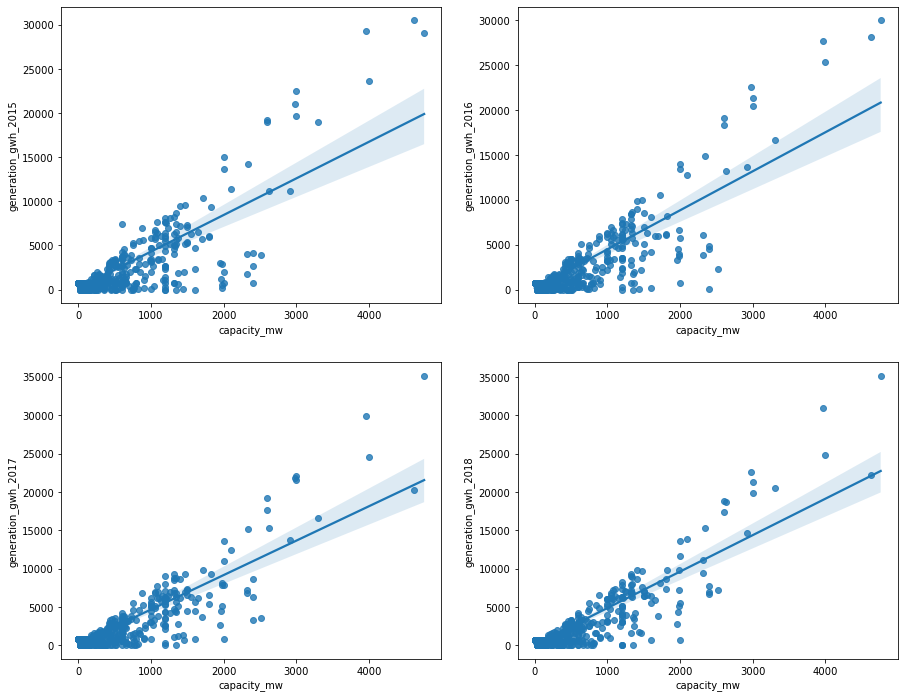

In [261]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.regplot(x='capacity_mw',y='generation_gwh_2015',ax=axes[0,0],data=df)

sns.regplot(x='capacity_mw',y='generation_gwh_2016',ax=axes[0,1],data=df)

sns.regplot(x='capacity_mw',y='generation_gwh_2017',ax=axes[1,0],data=df)

sns.regplot(x='capacity_mw',y='generation_gwh_2018',ax=axes[1,1],data=df)
plt.show()

Here we could see that the target variable has positive corr with the GWH

Now Let Us find The Relation B/W Both The Target  i.e capacity_w & Primary_Fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

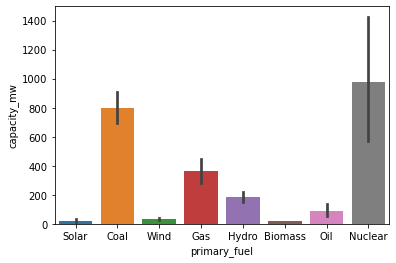

In [345]:
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)

about 60% of are energy is generated from The coal and Nuclear followed by Gas and Hydro ,The oil,biomass and solar has low energy generation 

Let us find the distribution of Skewnessin our dataset

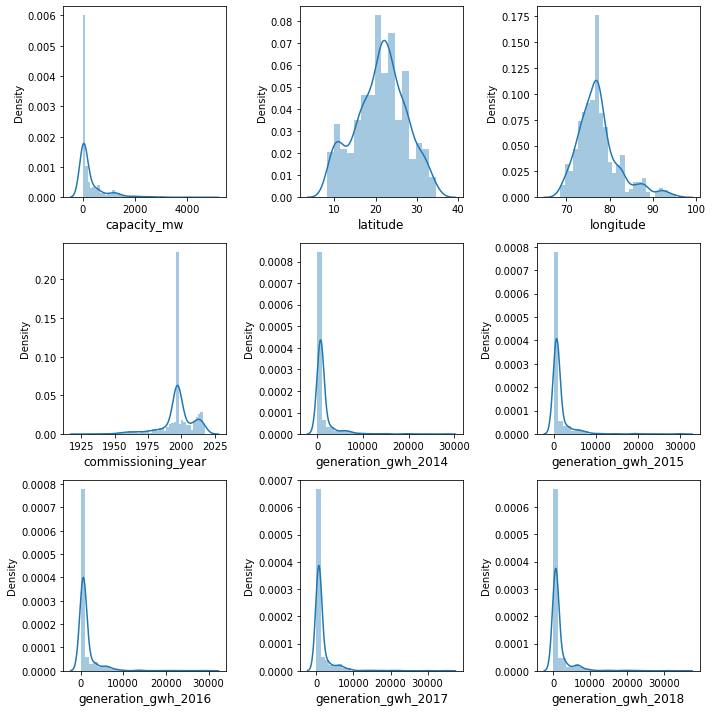

In [346]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in Num_data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

we could see that most of our data set look slightly skewed.

Let  make a bok plot to find the outliers.

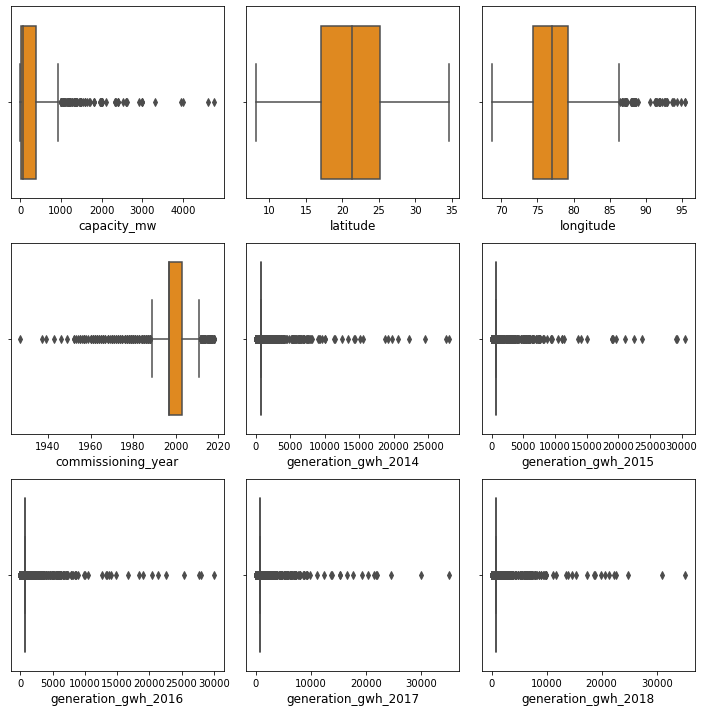

In [347]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in Num_data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# Outliers Removal

In [348]:
f_outliers=df[['longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

In [349]:
from scipy.stats import zscore

In [350]:
z=np.abs(zscore(f_outliers))

In [351]:
new_df=df[(z<3).all(axis=1)]
new_df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority


# Now let us check for data loss

In [352]:
df.shape

(907, 19)

In [353]:
new_df.shape

(853, 19)

In [354]:
(907-853)/907*100

5.953693495038589

almost 6 percent of Dataloss is there 

Now let us Encode the catogorical column

In [355]:
cat_data

Index(['country', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner',
       'source', 'url', 'geolocation_source', 'generation_data_source'],
      dtype='object')

In [356]:
from sklearn.preprocessing import LabelEncoder

In [357]:
LE=LabelEncoder()

In [358]:
new_df[cat_data]=new_df[cat_data].apply(LE.fit_transform)

In [359]:
new_df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,604,2.5,28.1839,73.2407,6,2,2011.000000,228,109,128,1,801.123775,711.181225,737.205450,817.977250,751.644375,0
1,0,1,466,98.0,24.7663,74.6090,1,2,1997.091082,257,174,173,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
2,0,2,799,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
3,0,3,0,135.0,23.8712,91.3602,2,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,4,1,1800.0,21.9603,82.4091,1,2,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,848,440,1600.0,16.2949,77.3568,1,2,2016.000000,5,22,58,2,801.123775,0.994875,233.596650,865.400000,686.500000,0
903,0,849,768,3.0,12.8932,78.1654,6,2,1997.091082,114,77,22,0,801.123775,711.181225,737.205450,817.977250,751.644375,0
904,0,850,837,25.5,15.2758,75.5811,7,2,1997.091082,5,21,260,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
905,0,851,486,80.0,24.3500,73.7477,1,2,1997.091082,91,59,82,2,801.123775,711.181225,737.205450,817.977250,751.644375,0


<AxesSubplot:>

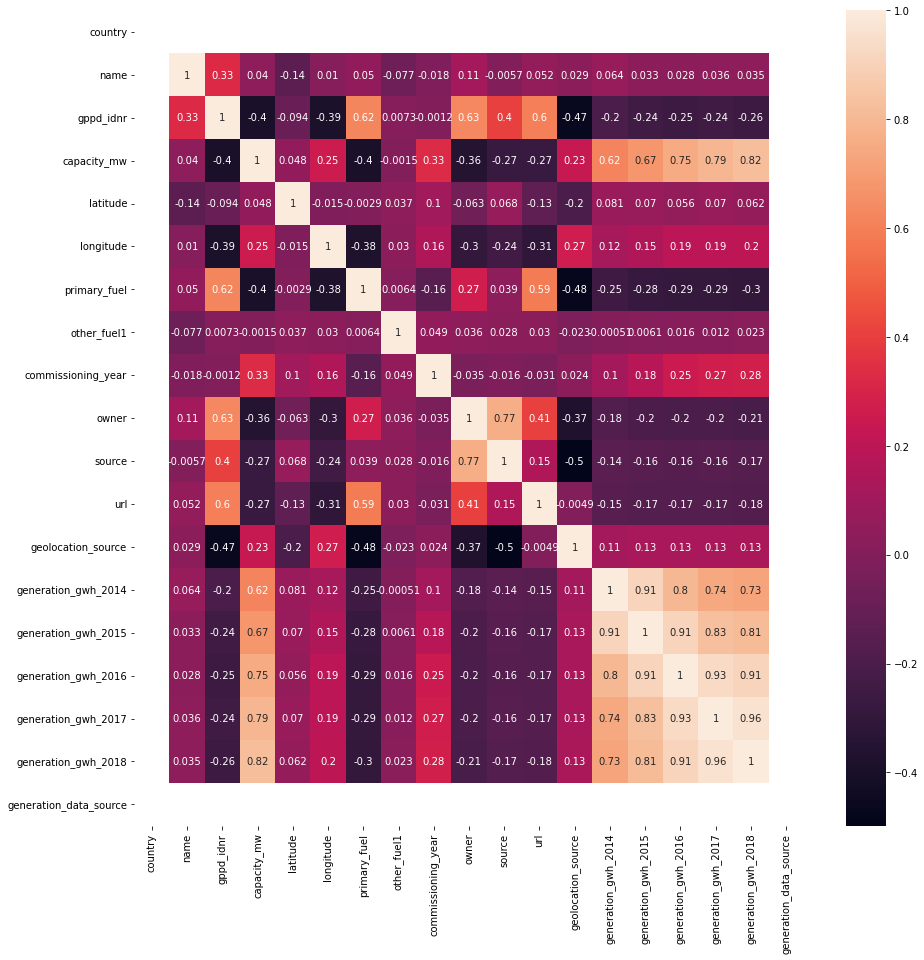

In [360]:
plt.subplots(figsize=(15,15))
sns.heatmap(new_df.corr(),annot=True)

From above heat map the features contain both positive and Negative corr
The Target variable Capacity_mw has a good positive corr with generation_gwh 
The capacity_MW having a negative corr with the source,owner,primary fuel


The Target primary fuel have negative corr with generation_source_gwh,longitude and Geolocation source

Let us again Visualise using a bar Plot

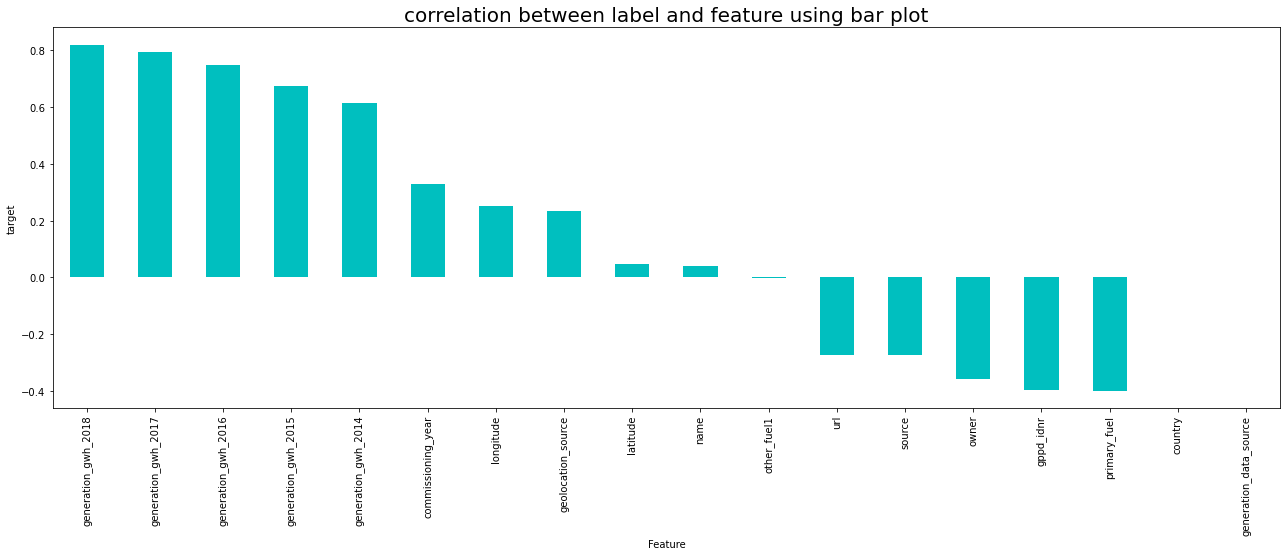

In [361]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

we could see that the latitude longitude and other fuels have a less corr with the target .

now let us visualise for other targetprimary_fuel

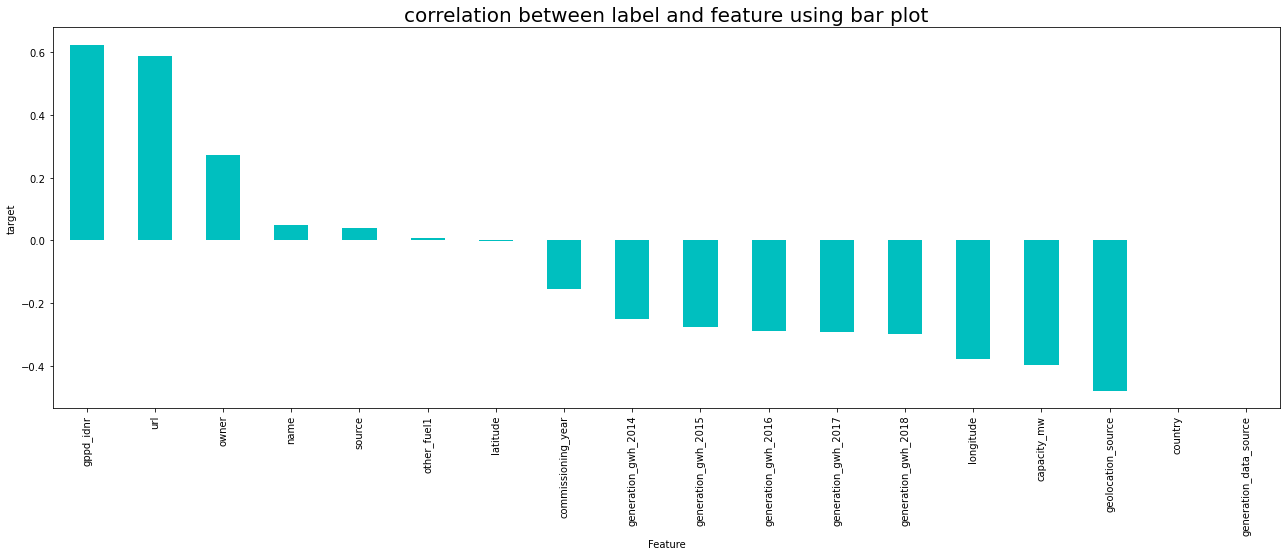

In [362]:
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

Here we could observe that the Latitude and other fuel has less corr() with the target

In [363]:
new_df.drop('latitude',axis=1,inplace=True)

In [364]:
new_df

,country,name,gppd_idnr,capacity_mw,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,604,2.5,73.2407,6,2,2011.000000,228,109,128,1,801.123775,711.181225,737.205450,817.977250,751.644375,0
1,0,1,466,98.0,74.6090,1,2,1997.091082,257,174,173,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
2,0,2,799,39.2,69.3732,7,2,1997.091082,2,21,205,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
3,0,3,0,135.0,91.3602,2,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,4,1,1800.0,82.4091,1,2,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,848,440,1600.0,77.3568,1,2,2016.000000,5,22,58,2,801.123775,0.994875,233.596650,865.400000,686.500000,0
903,0,849,768,3.0,78.1654,6,2,1997.091082,114,77,22,0,801.123775,711.181225,737.205450,817.977250,751.644375,0
904,0,850,837,25.5,75.5811,7,2,1997.091082,5,21,260,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
905,0,851,486,80.0,73.7477,1,2,1997.091082,91,59,82,2,801.123775,711.181225,737.205450,817.977250,751.644375,0


In [365]:
new_df.drop('other_fuel1',axis=1,inplace=True)

In [366]:
new_df

,country,name,gppd_idnr,capacity_mw,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,604,2.5,73.2407,6,2011.000000,228,109,128,1,801.123775,711.181225,737.205450,817.977250,751.644375,0
1,0,1,466,98.0,74.6090,1,1997.091082,257,174,173,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
2,0,2,799,39.2,69.3732,7,1997.091082,2,21,205,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
3,0,3,0,135.0,91.3602,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,4,1,1800.0,82.4091,1,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,848,440,1600.0,77.3568,1,2016.000000,5,22,58,2,801.123775,0.994875,233.596650,865.400000,686.500000,0
903,0,849,768,3.0,78.1654,6,1997.091082,114,77,22,0,801.123775,711.181225,737.205450,817.977250,751.644375,0
904,0,850,837,25.5,75.5811,7,1997.091082,5,21,260,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
905,0,851,486,80.0,73.7477,1,1997.091082,91,59,82,2,801.123775,711.181225,737.205450,817.977250,751.644375,0


Now our data is Structuctured and let us slit feature and target and train our model

In [367]:
x=new_df.drop('capacity_mw',axis=1)

In [368]:
y=new_df['capacity_mw']

Skewness check

In [369]:
x.skew()

country                   0.000000
name                      0.000000
gppd_idnr                 0.000000
longitude                 0.918797
primary_fuel              0.416292
commissioning_year       -0.839834
owner                     1.275596
source                    1.737981
url                       1.418248
geolocation_source       -2.070461
generation_gwh_2014       2.943364
generation_gwh_2015       2.717035
generation_gwh_2016       2.636655
generation_gwh_2017       2.533606
generation_gwh_2018       2.637972
generation_data_source    0.000000
dtype: float64

In [370]:
col=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','longitude']

In [371]:
from sklearn.preprocessing import PowerTransformer

In [287]:
pt=PowerTransformer()
x[col]=pt.fit_transform(x[col].values)

In [372]:
x[col].head(5)

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,longitude
0,801.123775,711.181225,737.205450,817.977250,751.644375,73.2407
1,801.123775,711.181225,737.205450,817.977250,751.644375,74.6090
2,801.123775,711.181225,737.205450,817.977250,751.644375,69.3732
3,617.789264,843.747000,886.004428,663.774500,626.239128,91.3602
4,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,82.4091


In [373]:
x[col].skew()

generation_gwh_2014    2.943364
generation_gwh_2015    2.717035
generation_gwh_2016    2.636655
generation_gwh_2017    2.533606
generation_gwh_2018    2.637972
longitude              0.918797
dtype: float64

In [374]:
scaler=StandardScaler()

In [375]:
x_scaled=scaler.fit_transform(x)

# VIF

In [376]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [377]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i)
              for  i in range(len(x.columns))]
vif['features'] = x.columns


In [378]:
vif

,VIF values,features
0,NaN,country
1,5.346591,name
2,15.562725,gppd_idnr
3,419.151997,longitude
4,10.851001,primary_fuel
5,502.788051,commissioning_year
6,5.610270,owner
7,7.813812,source
8,8.313145,url
9,22.919022,geolocation_source


we could see that the year of capacity has some multicolinearity problem.im drpping it out of mu data frame 

In [380]:
x

,country,name,gppd_idnr,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,604,73.2407,6,2011.000000,228,109,128,1,801.123775,711.181225,737.205450,817.977250,751.644375,0
1,0,1,466,74.6090,1,1997.091082,257,174,173,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
2,0,2,799,69.3732,7,1997.091082,2,21,205,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
3,0,3,0,91.3602,2,2004.000000,5,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,4,1,82.4091,1,2015.000000,5,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,848,440,77.3568,1,2016.000000,5,22,58,2,801.123775,0.994875,233.596650,865.400000,686.500000,0
903,0,849,768,78.1654,6,1997.091082,114,77,22,0,801.123775,711.181225,737.205450,817.977250,751.644375,0
904,0,850,837,75.5811,7,1997.091082,5,21,260,2,801.123775,711.181225,737.205450,817.977250,751.644375,0
905,0,851,486,73.7477,1,1997.091082,91,59,82,2,801.123775,711.181225,737.205450,817.977250,751.644375,0


Now let us split and train our model

In [381]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [433]:
from sklearn.model_selection import cross_val_score

In [403]:
reg=BaggingRegressor()
reg.fit(x_train,y_train)

y_pred=reg.predict(x_test)

In [400]:
print('R2 score is:',r2_score(y_test,y_pred))
print('MAE is:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE is:',mean_squared_error(y_test,y_pred))
print('RMSE is:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2 score is: -0.338476832762467
MAE is: 299.1128217571131
MSE is: 311000.5554355866
RMSE is: 557.6742377370382


In [436]:
print(cross_val_score(reg,x,y,cv=5).mean())

0.7591658319797185


In [412]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)



y_pred_rf=rf.predict(x_test)



In [413]:
print('R2 score is:',r2_score(y_test,y_pred_rf))
print('MAE is:',metrics.mean_absolute_error(y_test,y_pred_rf))
print('MSE is:',mean_squared_error(y_test,y_pred_rf))
print('RMSE is:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

R2 score is: 0.7772978979970827
MAE is: 118.50042855468749
MSE is: 51745.74241724754
RMSE is: 227.47690523929575


In [437]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7616272482934782


In [420]:
from sklearn.tree import DecisionTreeRegressor

In [423]:
df=DecisionTreeRegressor()
df.fit(x_train,y_train)

y_pred_dec=df.predict(x_test)

In [424]:
print('R2 score is:',r2_score(y_test,y_pred_dec))
print('MAE is:',metrics.mean_absolute_error(y_test,y_pred_dec))
print('MSE is:',mean_squared_error(y_test,y_pred_dec))
print('RMSE is:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dec)))

R2 score is: 0.628553819709514
MAE is: 149.43173437500002
MSE is: 86307.03614521876
RMSE is: 293.7805918457153


In [438]:
print(cross_val_score(df,x,y,cv=5).mean())

0.5148763318275293


In [426]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [430]:
knn=KNN()
knn.fit(x_train,y_train)

y_pred_knn=knn.predict(x_test)

In [431]:
print('R2 score is:',r2_score(y_test,y_pred_knn))
print('MAE is:',metrics.mean_absolute_error(y_test,y_pred_knn))
print('MSE is:',mean_squared_error(y_test,y_pred_knn))
print('RMSE is:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)))

R2 score is: 0.738676511857458
MAE is: 121.04640546875001
MSE is: 60719.579130077036
RMSE is: 246.41343131022106


In [439]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7390093649692064


In [442]:
lm=LinearRegression()
lm.fit(x_train,y_train)


y_pred_lm=lm.predict(x_test)

In [443]:
print('R2 score is:',r2_score(y_test,y_pred_lm))
print('MAE is:',metrics.mean_absolute_error(y_test,y_pred_lm))
print('MSE is:',mean_squared_error(y_test,y_pred_lm))
print('RMSE is:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lm)))

R2 score is: 0.7135253707103858
MAE is: 157.5303097205242
MSE is: 66563.54943655929
RMSE is: 257.99912681355977


In [444]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.7184992115912904


From the above Model we conclude that the RandomForestRegressor is the best model and proceed with hyper parameter tuning

Let procced with HyperParameterTuning to increase score

In [452]:
parameter={'n_estimators':[100,120,145,177,180,200],
          'criterion':["mse","mae"],
          'max_depth':[2,10,2],
          'min_samples_leaf':[2,10,15,20],
          'min_samples_split':range(2,10,2),
          'max_features':['auto','log2','sqrt']}

In [453]:
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [454]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 10, 2],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [2, 10, 15, 20],
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 120, 145, 177, 180, 200]})

In [458]:
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 120}

In [462]:
gcv_params=RandomForestRegressor(criterion='mse',max_depth=10,max_features='log2',min_samples_leaf=2,min_samples_split=4,n_estimators=120)

In [463]:
gcv_params.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=10, max_features='log2',
                      min_samples_leaf=2, min_samples_split=4,
                      n_estimators=120)

In [464]:
gcv_pred=gcv_params.predict(x_test)

In [468]:
print('R2 score is:',r2_score(y_test,gcv_pred))

R2 score is: 0.7568835976537033


Saving the model

In [469]:
import pickle

In [470]:
filename='Global_powerplant'
pickle.dump('rd',open(filename,'wb'))

# Fuel Type Prediction

In [471]:
x_1=new_df.drop('primary_fuel',axis=1)

In [472]:
y_1=new_df['primary_fuel']

In [473]:
x_1.skew()

country                   0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               2.187610
longitude                 0.918797
commissioning_year       -0.839834
owner                     1.275596
source                    1.737981
url                       1.418248
geolocation_source       -2.070461
generation_gwh_2014       2.943364
generation_gwh_2015       2.717035
generation_gwh_2016       2.636655
generation_gwh_2017       2.533606
generation_gwh_2018       2.637972
generation_data_source    0.000000
dtype: float64

we could see skewness in Generation_gwh,longitude,capacity_mw

In [475]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2017']


In [477]:
pt=PowerTransformer()

In [479]:
x_1[skew]=pt.fit_transform(x_1[skew].values)

In [480]:
x_1.skew()

country                   0.000000
name                      0.000000
gppd_idnr                 0.000000
capacity_mw               0.016851
longitude                -0.000194
commissioning_year       -0.839834
owner                     1.275596
source                    1.737981
url                       1.418248
geolocation_source       -2.070461
generation_gwh_2014       0.232505
generation_gwh_2015       0.163986
generation_gwh_2016       0.146269
generation_gwh_2017       0.126962
generation_gwh_2018       2.637972
generation_data_source    0.000000
dtype: float64

In [482]:
x_1=scaler.fit_transform(x_1)

now let check if our target variable is balanced or not

In [499]:
y_1.value_counts()

1    239
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

its not balamced let us balance this using upsampling 

In [500]:
from imblearn.over_sampling import SMOTE

In [502]:
smote=SMOTE()
x_1,y_1=smote.fit_resample(x_1,y_1)

In [504]:
y_1.value_counts()

6    239
1    239
7    239
2    239
3    239
0    239
5    239
4    239
Name: primary_fuel, dtype: int64

In [512]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

NOW THE DATA IS PERFECTLY BALANCED

LET US BUILD THE MODEL

In [508]:
x_1_train,x_1_test,y_1_train,y_1_test=train_test_split(x_1,y_1,test_size=0.3,random_state=40)

In [509]:
from sklearn.linear_model import LogisticRegression

In [510]:
log=LogisticRegression()
log.fit(x_1_train,y_1_train)

y_pred_log=log.predict(x_1_test)

In [516]:
print('Accuracy score is:',accuracy_score(y_1_test,y_pred_log))
print('classification report is:',classification_report(y_1_test,y_pred_log))
print('Confusion Matrix is:',confusion_matrix(y_1_test,y_pred_log))

Accuracy score is: 0.7613240418118467
classification report is:               precision    recall  f1-score   support

           0       0.76      0.97      0.86        73
           1       0.59      0.39      0.47        70
           2       0.53      0.42      0.47        69
           3       0.58      0.62      0.60        71
           4       0.82      0.94      0.87        78
           5       0.73      0.74      0.73        76
           6       1.00      1.00      1.00        66
           7       0.99      1.00      0.99        71

    accuracy                           0.76       574
   macro avg       0.75      0.76      0.75       574
weighted avg       0.75      0.76      0.75       574

Confusion Matrix is: [[71  0  0  0  0  2  0  0]
 [10 27  9 10 10  4  0  0]
 [ 3 11 29 12  3 11  0  0]
 [ 0  5 15 44  3  4  0  0]
 [ 0  0  0  4 73  0  0  1]
 [ 9  3  2  6  0 56  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 71]]


In [546]:
print(cross_val_score(log,x_1,y_1,cv=5).mean())

0.7568206362008393


In [522]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_1_train,y_1_train)

rfc_pred=rfc.predict(x_1_test)

In [523]:
print('Accuracy score is:',accuracy_score(y_1_test,rfc_pred))
print('classification report is:',classification_report(y_1_test,rfc_pred))
print('Confusion Matrix is:',confusion_matrix(y_1_test,rfc_pred))

Accuracy score is: 0.9094076655052264
classification report is:               precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.79      0.66      0.72        70
           2       0.83      0.84      0.83        69
           3       0.84      0.87      0.86        71
           4       0.94      0.97      0.96        78
           5       0.93      0.93      0.93        76
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        71

    accuracy                           0.91       574
   macro avg       0.91      0.91      0.91       574
weighted avg       0.91      0.91      0.91       574

Confusion Matrix is: [[72  1  0  0  0  0  0  0]
 [ 5 46  7  7  2  3  0  0]
 [ 1  4 58  2  2  2  0  0]
 [ 0  6  2 62  1  0  0  0]
 [ 0  0  2  0 76  0  0  0]
 [ 0  1  1  3  0 71  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 71]]


In [547]:
print(cross_val_score(rfc,x_1,y_1,cv=5).mean())

0.9048282367093627


In [527]:
bac=BaggingClassifier()
bac.fit(x_1_train,y_1_train)

bac_predict=bac.predict(x_1_test)

In [528]:
print('Accuracy score is:',accuracy_score(y_1_test,bac_predict))
print('classification report is:',classification_report(y_1_test,bac_predict))
print('Confusion Matrix is:',confusion_matrix(y_1_test,bac_predict))

Accuracy score is: 0.8780487804878049
classification report is:               precision    recall  f1-score   support

           0       0.91      0.97      0.94        73
           1       0.72      0.56      0.63        70
           2       0.73      0.84      0.78        69
           3       0.83      0.76      0.79        71
           4       0.90      0.97      0.94        78
           5       0.90      0.91      0.90        76
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        71

    accuracy                           0.88       574
   macro avg       0.87      0.88      0.87       574
weighted avg       0.88      0.88      0.87       574

Confusion Matrix is: [[71  2  0  0  0  0  0  0]
 [ 7 39  7  7  7  3  0  0]
 [ 0  5 58  1  0  5  0  0]
 [ 0  7  9 54  1  0  0  0]
 [ 0  0  2  0 76  0  0  0]
 [ 0  1  3  3  0 69  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 71]]


In [548]:
print(cross_val_score(bac,x_1,y_1,cv=5).mean())

0.8928000218719669


In [536]:
from sklearn.tree import DecisionTreeClassifier
dac=DecisionTreeClassifier()
dac.fit(x_1_train,y_1_train)


dac_pred=dac.predict(x_1_test)

In [538]:
print('Accuracy score is:',accuracy_score(y_1_test,dac_pred))
print('classification report is:',classification_report(y_1_test,dac_pred))
print('Confusion Matrix is:',confusion_matrix(y_1_test,dac_pred))

Accuracy score is: 0.8432055749128919
classification report is:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.73      0.51      0.61        70
           2       0.62      0.65      0.64        69
           3       0.65      0.77      0.71        71
           4       0.95      0.94      0.94        78
           5       0.85      0.91      0.88        76
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        71

    accuracy                           0.84       574
   macro avg       0.84      0.84      0.84       574
weighted avg       0.85      0.84      0.84       574

Confusion Matrix is: [[69  4  0  0  0  0  0  0]
 [ 3 36 13 10  3  5  0  0]
 [ 0  4 45 13  0  7  0  0]
 [ 0  3 12 55  1  0  0  0]
 [ 0  1  0  4 73  0  0  0]
 [ 1  1  2  3  0 69  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 71]]


In [549]:
print(cross_val_score(dac,x_1,y_1,cv=5).mean())

0.8593208754254782


In [541]:
GBC=GradientBoostingClassifier()
GBC.fit(x_1_train,y_1_train)

GBC_pred=GBC.predict(x_1_test)

In [542]:
print('Accuracy score is:',accuracy_score(y_1_test,GBC_pred))
print('classification report is:',classification_report(y_1_test,GBC_pred))
print('Confusion Matrix is:',confusion_matrix(y_1_test,GBC_pred))

Accuracy score is: 0.8954703832752613
classification report is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95        73
           1       0.81      0.63      0.71        70
           2       0.81      0.78      0.79        69
           3       0.78      0.83      0.80        71
           4       0.92      0.97      0.94        78
           5       0.93      0.93      0.93        76
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        71

    accuracy                           0.90       574
   macro avg       0.89      0.89      0.89       574
weighted avg       0.89      0.90      0.89       574

Confusion Matrix is: [[73  0  0  0  0  0  0  0]
 [ 5 44  6 10  2  3  0  0]
 [ 2  3 54  5  3  2  0  0]
 [ 0  5  5 59  2  0  0  0]
 [ 0  0  2  0 76  0  0  0]
 [ 1  2  0  2  0 71  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 71]]


In [550]:
print(cross_val_score(GBC,x_1,y_1,cv=5).mean())

0.8765860593550505


Here GradientBoostingClassifier has better accuracy let us do a hyperparametertuning

In [551]:
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [552]:
gcv_1=GridSearchCV(GBC,parameters,cv=5)

In [553]:
gcv_1.fit(x_1_train,y_1_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [554]:
gcv_1.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [558]:
GBC=GradientBoostingClassifier(criterion='mse',max_depth=8,max_features='sqrt',n_estimators=200)

In [559]:
GBC.fit(x_1_train,y_1_train)

GradientBoostingClassifier(criterion='mse', max_depth=8, max_features='sqrt',
                           n_estimators=200)

In [561]:
GBC_pred_1=GBC.predict(x_1_test)

In [562]:
print('Accuracy score is:',accuracy_score(y_1_test,GBC_pred_1))
print('classification report is:',classification_report(y_1_test,GBC_pred_1))
print('Confusion Matrix is:',confusion_matrix(y_1_test,GBC_pred_1))

Accuracy score is: 0.9128919860627178
classification report is:               precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       0.78      0.73      0.76        70
           2       0.84      0.86      0.85        69
           3       0.82      0.83      0.83        71
           4       0.97      0.97      0.97        78
           5       0.95      0.93      0.94        76
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        71

    accuracy                           0.91       574
   macro avg       0.91      0.91      0.91       574
weighted avg       0.91      0.91      0.91       574

Confusion Matrix is: [[71  2  0  0  0  0  0  0]
 [ 3 51  5  8  1  2  0  0]
 [ 2  3 59  2  1  2  0  0]
 [ 0  8  4 59  0  0  0  0]
 [ 0  0  2  0 76  0  0  0]
 [ 1  1  0  3  0 71  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 71]]


# Plotting Roc CURVE

In [1]:
from sklearn.metrics import plot_roc_curve

In [2]:
plot_roc_curve(GBC, x_1_test, y_1_test)
plt.title("ROC for the best model")
plt.show()

NameError: name 'GBC' is not defined

# SAVING THE MODEL

In [566]:
filename='global-power_fuel'
pickle.dump('rd',open('filename','wb'))